# Explore here

Using the New York housing rental data from the Airbnb app during 2019, I'm aiming to see what is the most popular area for people to buy if they are determined to purchase an Airbnb

In [45]:
import os
import requests

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
file_path = "./data/raw/AB_NYC_2019.csv"

os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Fetch the content from the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Write the content to a CSV file
with open(file_path, "wb") as file:
    file.write(response.content)

print(f"Data downloaded and saved to {file_path}")


Data downloaded and saved to ./data/raw/AB_NYC_2019.csv


In [46]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [47]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/nyc.db')

df.to_sql('Nyc_Airbnb', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'Nyc_Airbnb' table.")

Dataset stored in SQLite database as 'Nyc_Airbnb' table.


In [48]:

nyc = pd.read_sql('SELECT * FROM Nyc_Airbnb', con=engine)

nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [49]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [50]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
7.85       1
7.29       1
10.37      1
9.21       1
10.54      1
Name: count, Length: 937, dtype: int64

In [51]:
nyc.shape

(48895, 16)

In [52]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [53]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [54]:
df = df.drop(["id", "name", "availability_365", "host_id", "host_name", "minimum_nights", "reviews_per_month", "last_review", "calculated_host_listings_count" ], axis=1)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,0


In [55]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
neighbourhood_group,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
number_of_reviews,0,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   neighbourhood        48895 non-null  object 
 2   latitude             48895 non-null  float64
 3   longitude            48895 non-null  float64
 4   room_type            48895 non-null  object 
 5   price                48895 non-null  int64  
 6   number_of_reviews    48895 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.6+ MB


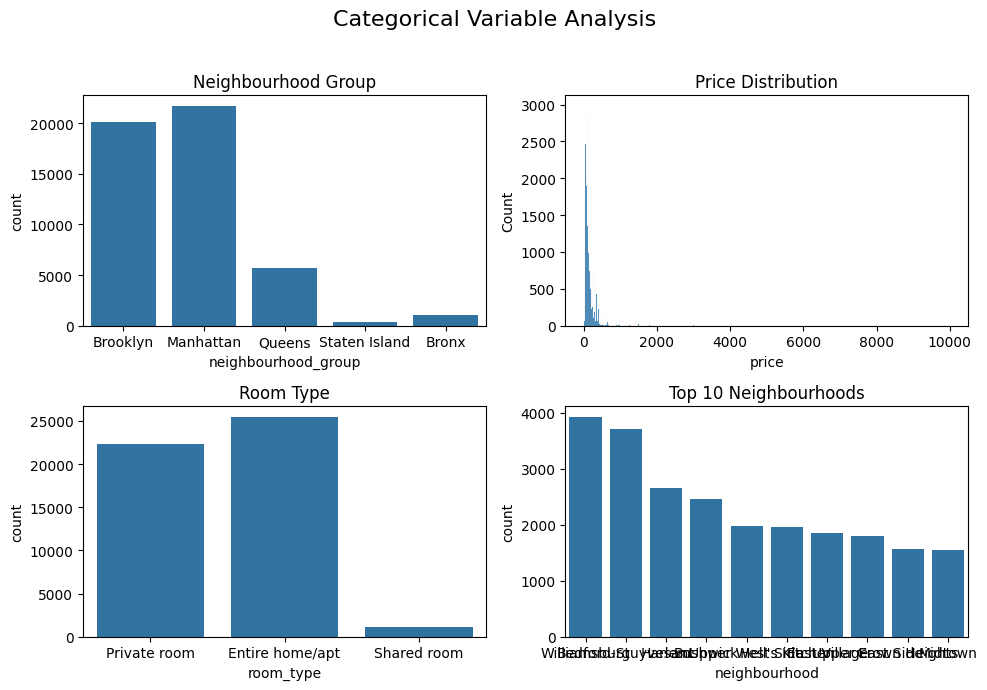

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['neighbourhood_group', 'price', 'room_type']

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.countplot(ax=axis[0, 0], data=df, x="neighbourhood_group")
axis[0, 0].set_title("Neighbourhood Group")

sns.histplot(ax=axis[0, 1], data=df, x="price")
axis[0, 1].set_title("Price Distribution")

sns.countplot(ax=axis[1, 0], data=df, x="room_type")
axis[1, 0].set_title("Room Type")

sns.countplot(ax=axis[1, 1], data=df, x="neighbourhood", order=df['neighbourhood'].value_counts().index[:10])
axis[1, 1].set_title("Top 10 Neighbourhoods")

plt.suptitle("Categorical Variable Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

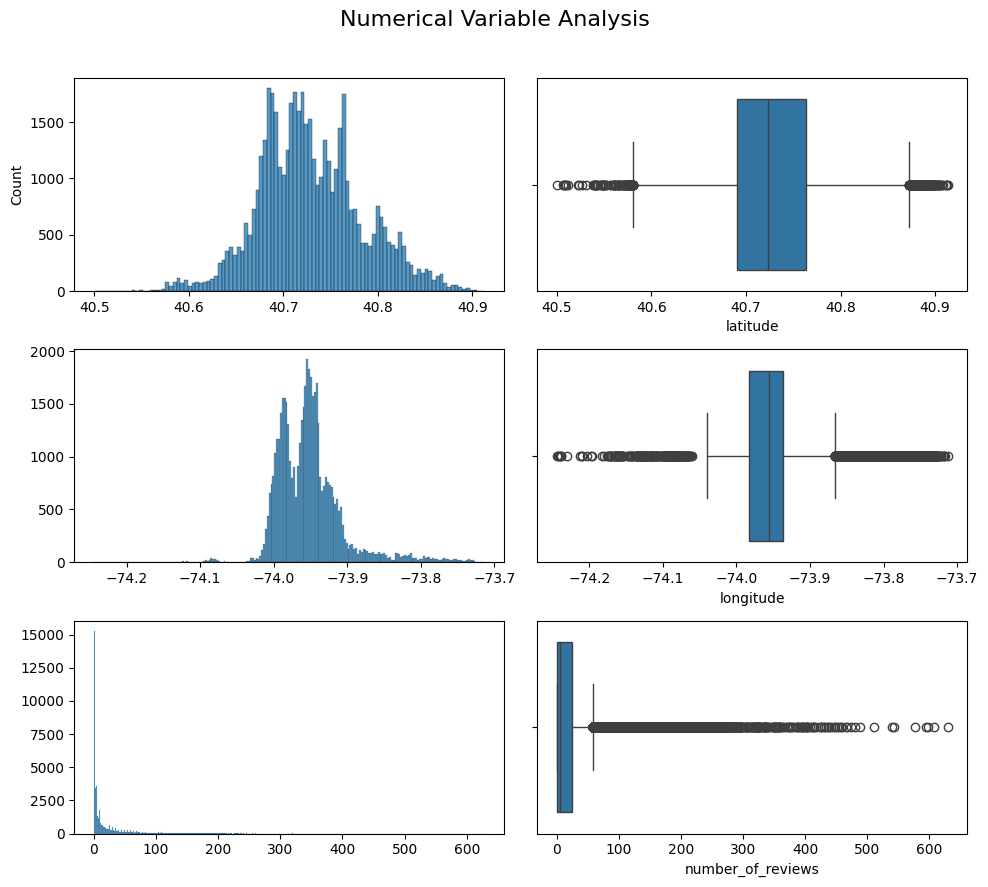

In [58]:

fig, axis = plt.subplots(3, 2, figsize=(10, 9))  

sns.histplot(ax=axis[0, 0], data=df, x="latitude").set(xlabel=None)
sns.boxplot(ax=axis[0, 1], data=df, x="latitude")
sns.histplot(ax=axis[1, 0], data=df, x="longitude").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="longitude")
sns.histplot(ax=axis[2, 0], data=df, x="number_of_reviews").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[2, 1], data=df, x="number_of_reviews")

plt.suptitle("Numerical Variable Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

The latitude and longitude distributions and boxplots show that most of the listings are mainly within a particular area, but there are a few outliers.
The latitude values are seem to be more clumped together, suggesting most properties are located along a similar latitude, while the longitude values are more spread out, indicating a wider area from east to west.
The right-skewed distribution of reviews suggests that only a small percentage of properties have been rented frequently enough to receive a large number of reviews. This is typical for platforms like Airbnb, where only a few properties are consistently popular while many receive fewer bookings and reviews.

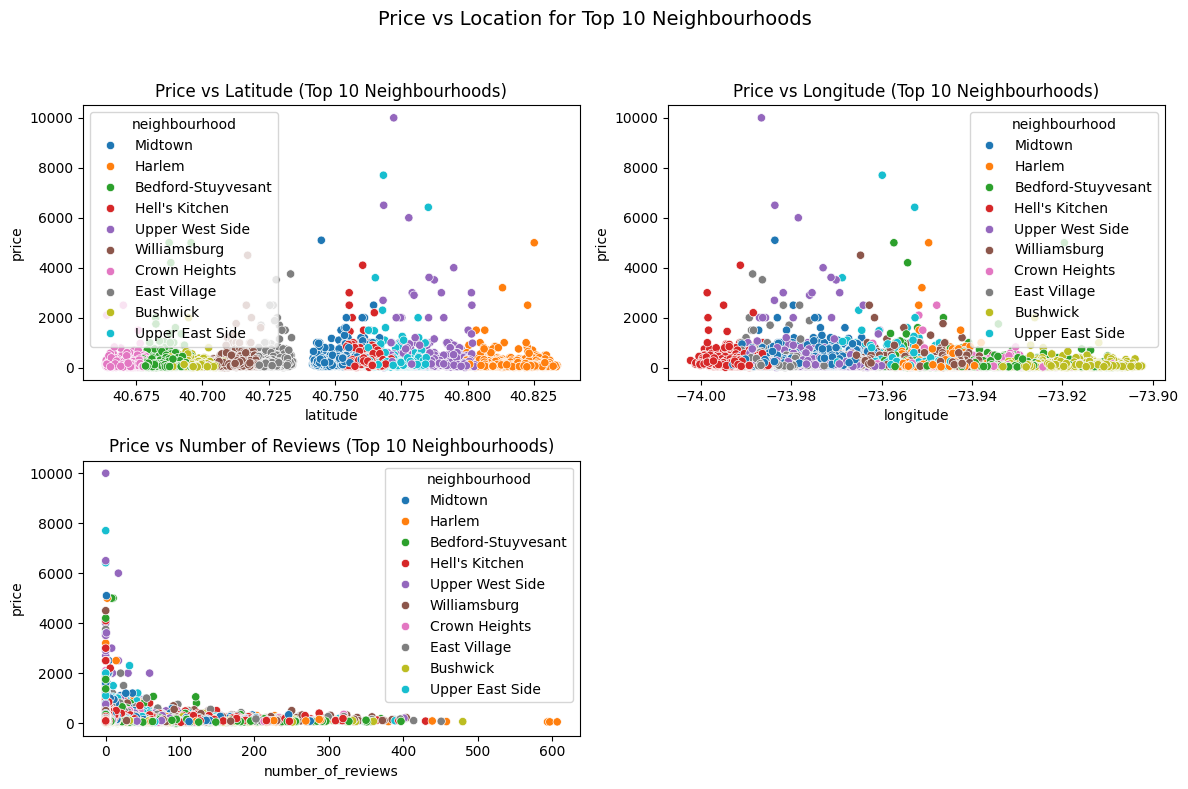

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

top_neighbourhoods = df['neighbourhood'].value_counts().index[:10]
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

fig, axis = plt.subplots(2, 2, figsize=(12, 8)) 

sns.scatterplot(ax=axis[0, 0], data=df_top_neighbourhoods, x="latitude", y="price", hue="neighbourhood", palette="tab10")
axis[0, 0].set_title("Price vs Latitude (Top 10 Neighbourhoods)")

sns.scatterplot(ax=axis[0, 1], data=df_top_neighbourhoods, x="longitude", y="price", hue="neighbourhood", palette="tab10")
axis[0, 1].set_title("Price vs Longitude (Top 10 Neighbourhoods)")

sns.scatterplot(ax=axis[1, 0], data=df_top_neighbourhoods, x="number_of_reviews", y="price", hue="neighbourhood", palette="tab10")
axis[1, 0].set_title("Price vs Number of Reviews (Top 10 Neighbourhoods)")

fig.delaxes(axis[1, 1])

plt.suptitle("Price vs Location for Top 10 Neighbourhoods", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From what I can tell here neighborhoods with stable pricing and high reviews may be the most desirable for investment, while those with fewer reviews may present opportunities for future growth.

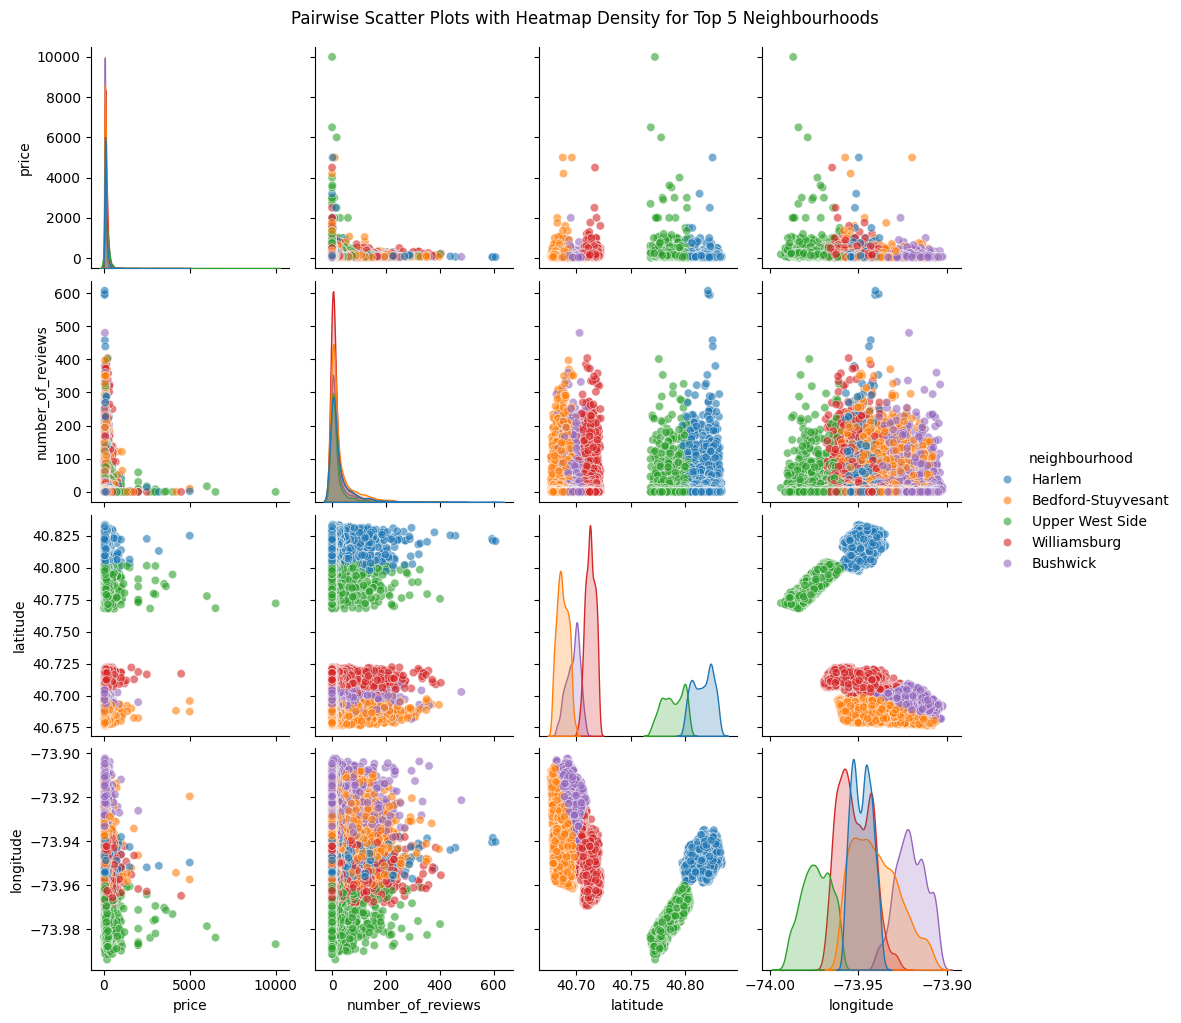

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

top_neighbourhoods = df['neighbourhood'].value_counts().index[:5]
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]
selected_features = ['price', 'number_of_reviews', 'latitude', 'longitude']

sns.pairplot(df_top_neighbourhoods, vars=selected_features, hue='neighbourhood', palette="tab10", plot_kws={'alpha':0.6})

plt.suptitle("Pairwise Scatter Plots with Heatmap Density for Top 5 Neighbourhoods", y=1.02)
plt.show()

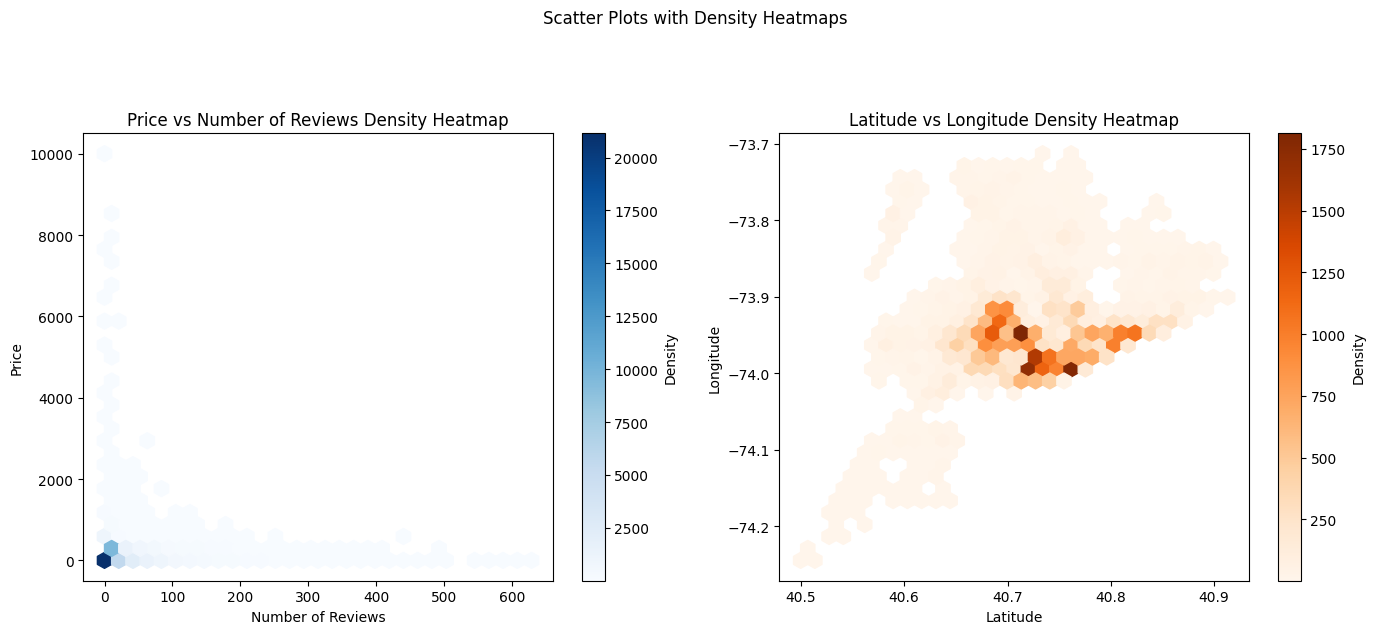

In [61]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

hb1 = axes[0].hexbin(df['number_of_reviews'], df['price'], gridsize=30, cmap='Blues', mincnt=1)
axes[0].set_xlabel("Number of Reviews")
axes[0].set_ylabel("Price")
axes[0].set_title("Price vs Number of Reviews Density Heatmap")
fig.colorbar(hb1, ax=axes[0], label='Density')

hb2 = axes[1].hexbin(df['latitude'], df['longitude'], gridsize=30, cmap='Oranges', mincnt=1)
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Longitude")
axes[1].set_title("Latitude vs Longitude Density Heatmap")
fig.colorbar(hb2, ax=axes[1], label='Density')

plt.suptitle("Scatter Plots with Density Heatmaps", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The first graph has most listings cluster in the lower price range with fewer reviews, though some higher-priced properties also attract a large number of reviews. While the 2nd graph looks like there are a lot concentrated in one area.

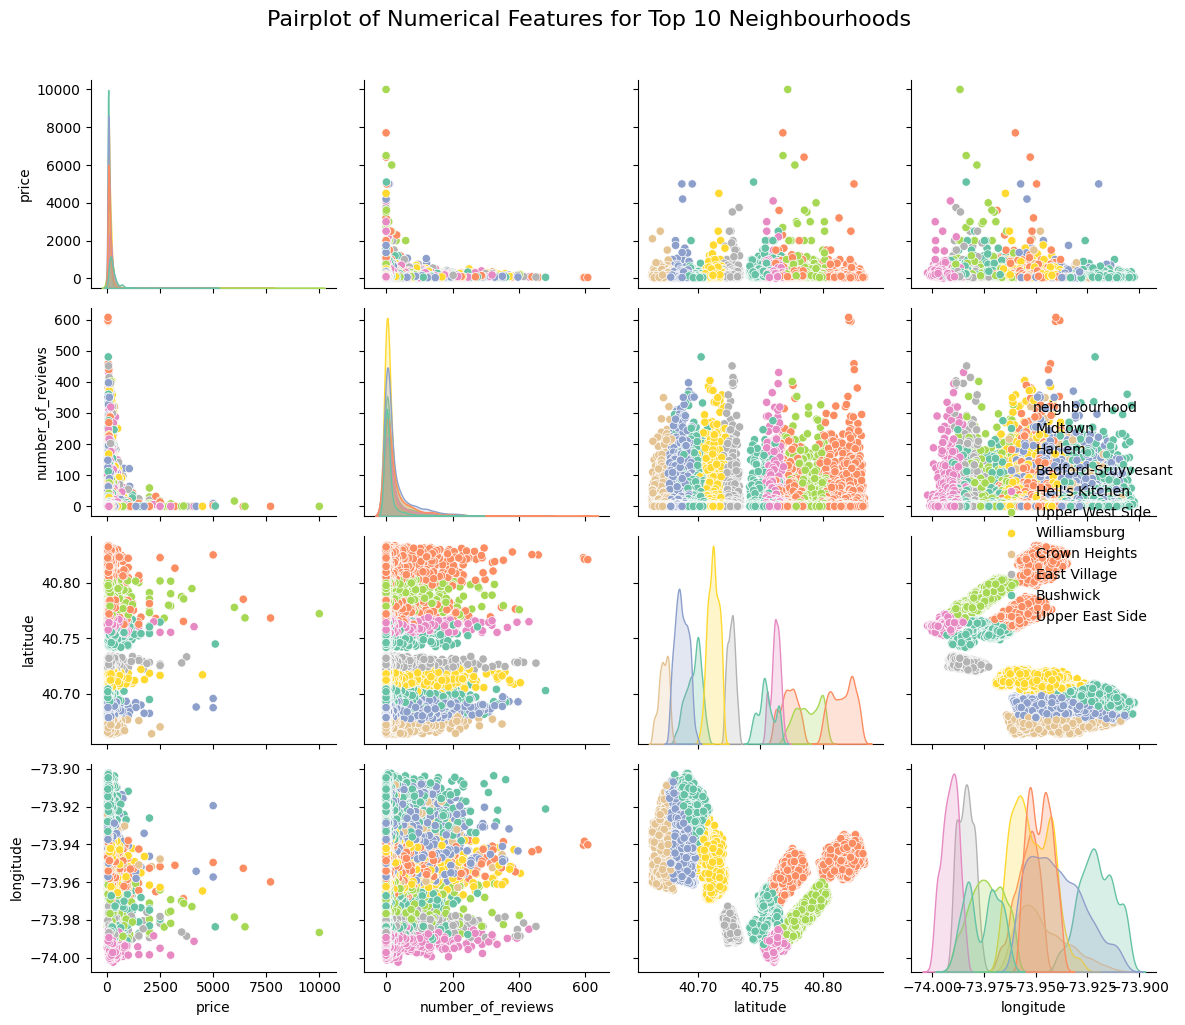

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['price', 'number_of_reviews', 'latitude', 'longitude']

top_neighbourhoods = df['neighbourhood'].value_counts().index[:10]

df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

sns.pairplot(data=df_top_neighbourhoods[numerical_features + ['neighbourhood']], hue='neighbourhood', palette='Set2')

plt.suptitle("Pairplot of Numerical Features for Top 10 Neighbourhoods", y=1.02, fontsize=16)
plt.tight_layout()

plt.show()

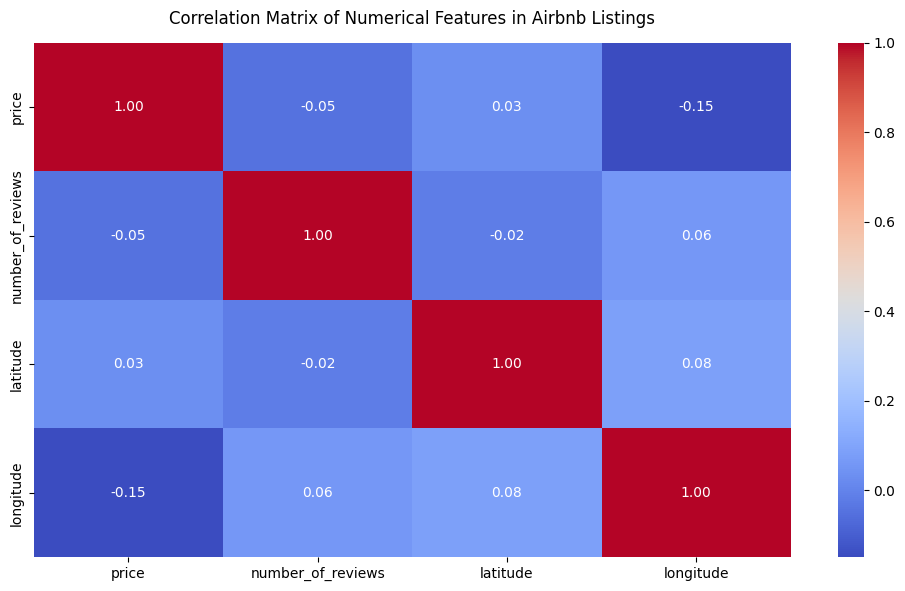

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['price', 'number_of_reviews', 'latitude', 'longitude']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Matrix of Numerical Features in Airbnb Listings", y=1.02)
plt.tight_layout()

plt.show()


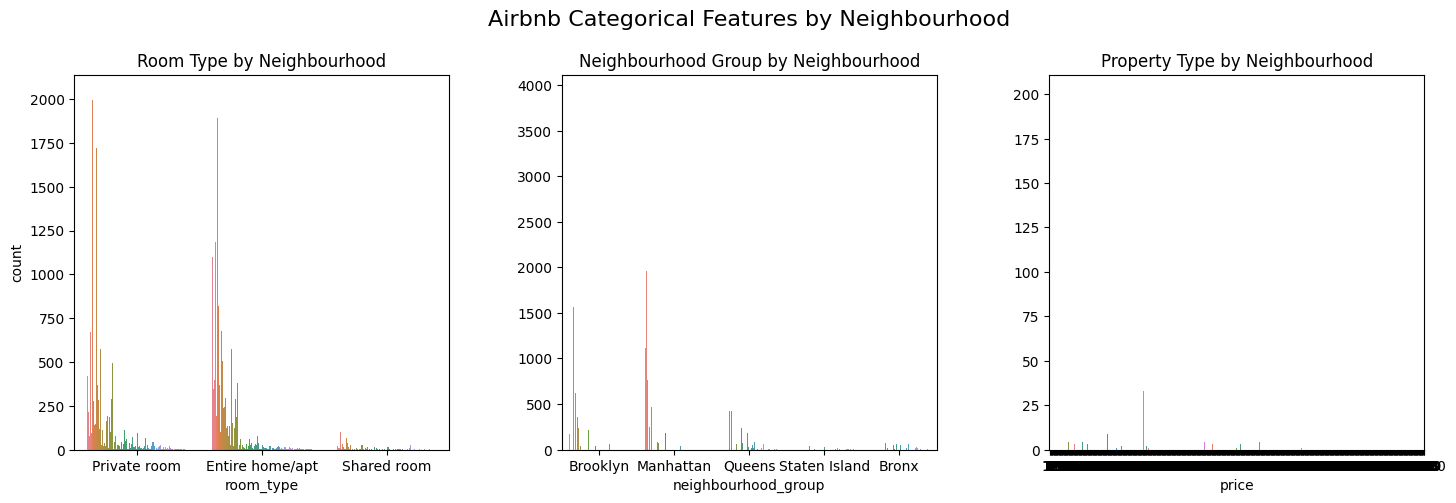

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axis[0], data=df, x="room_type", hue="neighbourhood")
axis[0].set_title("Room Type by Neighbourhood")

sns.countplot(ax=axis[1], data=df, x="neighbourhood_group", hue="neighbourhood").set(ylabel=None)
axis[1].set_title("Neighbourhood Group by Neighbourhood")

sns.countplot(ax=axis[2], data=df, x="price", hue="neighbourhood").set(ylabel=None)
axis[2].set_title("Property Type by Neighbourhood")

fig.suptitle("Airbnb Categorical Features by Neighbourhood", fontsize=16)

plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.1, wspace=0.3)

for ax in axis:
    ax.legend([],[], frameon=False) 

plt.show()


Some neighborhood groups dominate Airbnb listings, suggesting these areas are more active or popular for short-term rentals

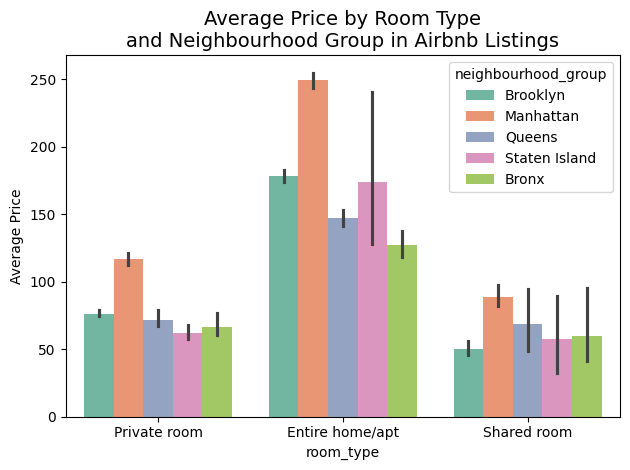

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x="room_type", y="price", hue="neighbourhood_group", palette="Set2")

plt.ylabel("Average Price")
plt.title("Average Price by Room Type\nand Neighbourhood Group in Airbnb Listings", fontsize=14)

plt.tight_layout()
plt.show()

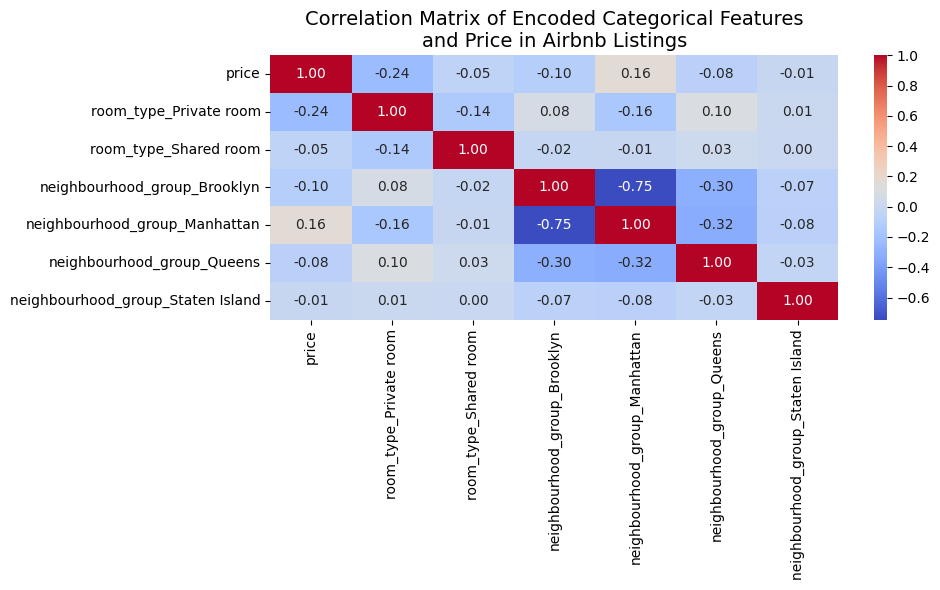

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_features = ['room_type', 'neighbourhood_group', 'price']

df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

df_encoded['price'] = df['price']

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# Set title and show plot
plt.title("Correlation Matrix of Encoded Categorical Features\nand Price in Airbnb Listings", fontsize=14)
plt.tight_layout()
plt.show()


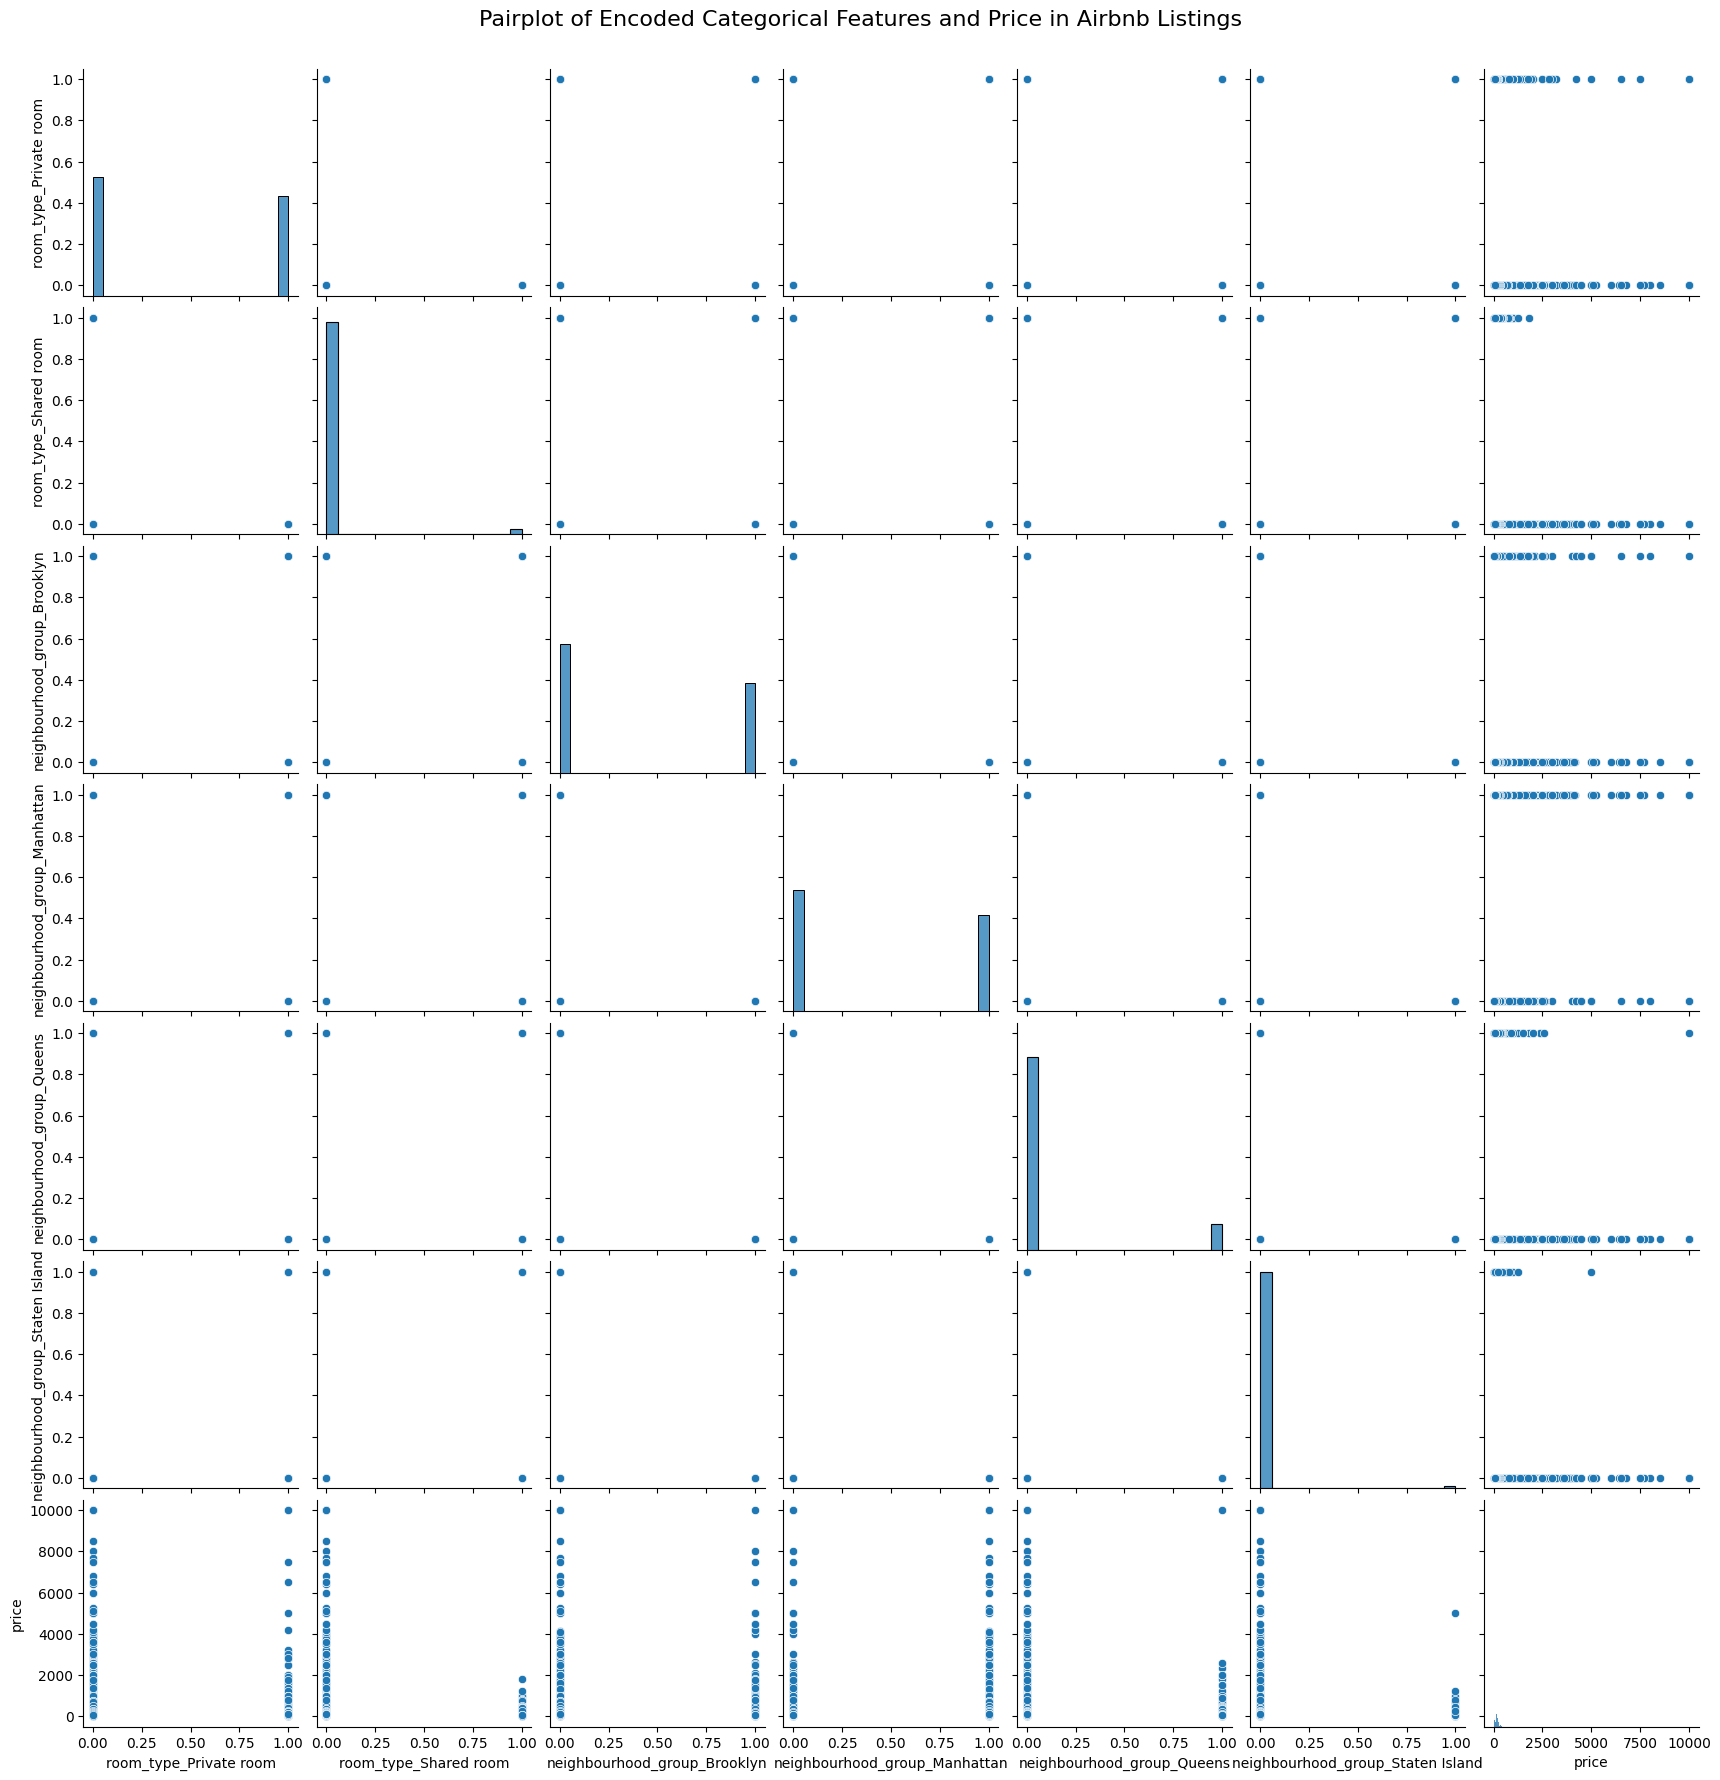

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

categorical_features = ['room_type', 'neighbourhood_group']
numerical_features = ['price'] 

df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

df_encoded['price'] = df['price']

sns.pairplot(data=df_encoded)
plt.suptitle("Pairplot of Encoded Categorical Features and Price in Airbnb Listings", y=1.02, fontsize=16)
plt.show()

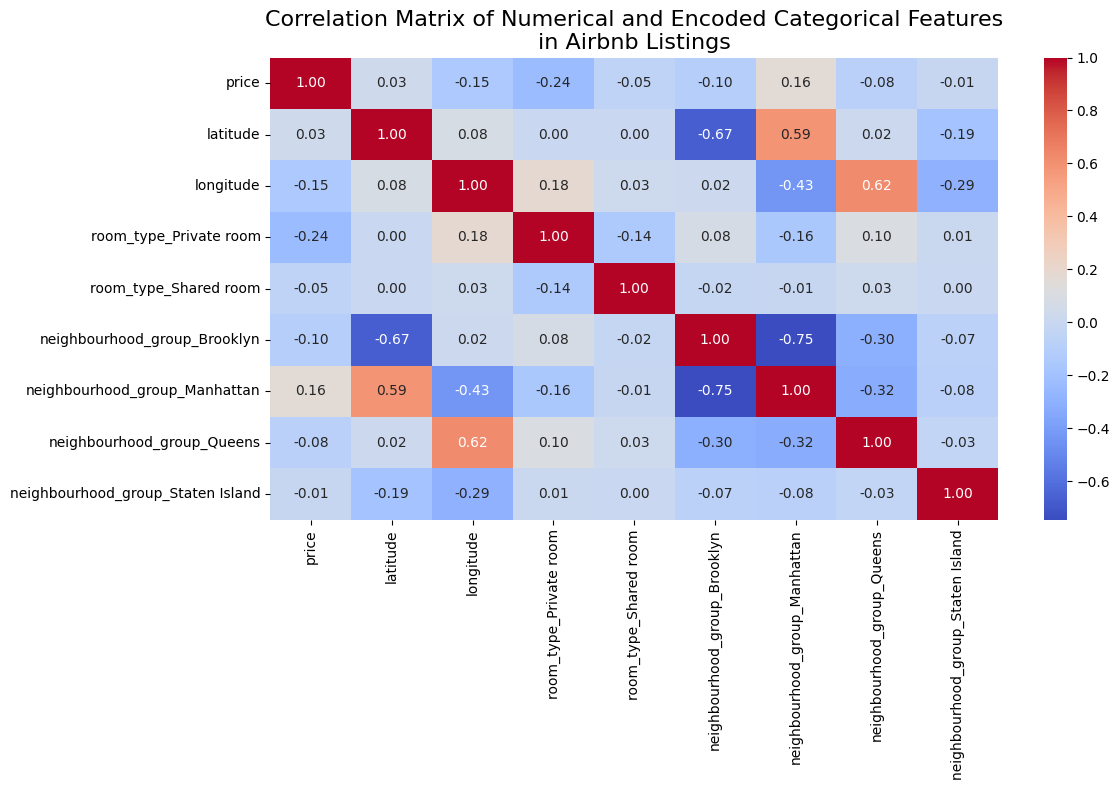

In [68]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

numerical_features = ['price', 'latitude', 'longitude']
categorical_features = ['room_type', 'neighbourhood_group']

df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

df_combined = pd.concat([df[numerical_features], df_encoded], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Matrix of Numerical and Encoded Categorical Features\nin Airbnb Listings", fontsize=16)
plt.tight_layout()
plt.show()


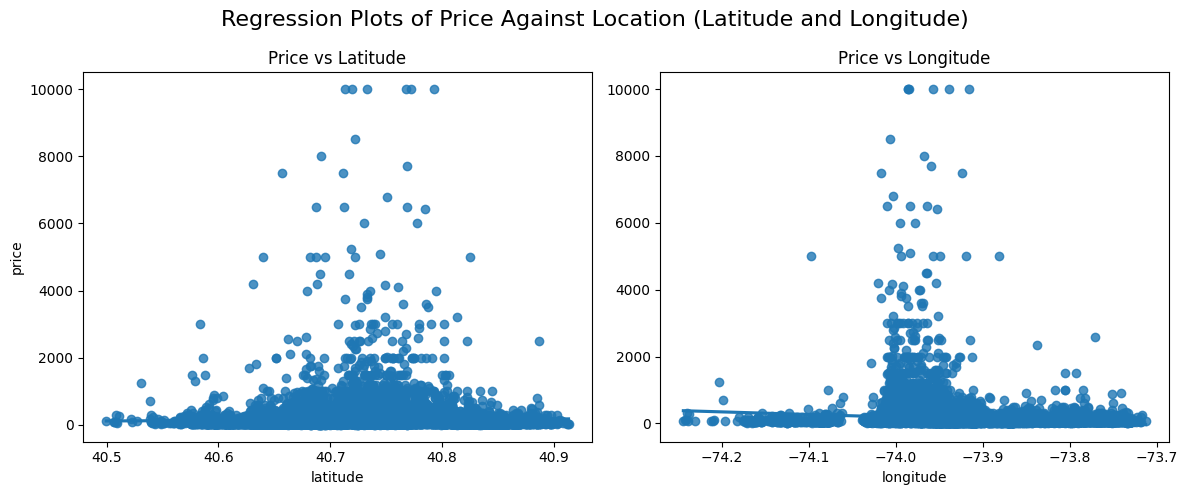

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(12, 5), ncols=2)

sns.regplot(ax=axis[0], data=df, x="latitude", y="price")
axis[0].set_title("Price vs Latitude")

sns.regplot(ax=axis[1], data=df, x="longitude", y="price").set(ylabel=None)
axis[1].set_title("Price vs Longitude")

fig.suptitle("Regression Plots of Price Against Location (Latitude and Longitude)", fontsize=16)
plt.tight_layout()

plt.show()

In [70]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,latitude,longitude,price,number_of_reviews
mean,40.728949,-73.952170,152.720687,23.274466
min,40.499790,-74.244420,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000
75%,40.763115,-73.936275,175.000000,24.000000
max,40.913060,-73.712990,10000.000000,629.000000


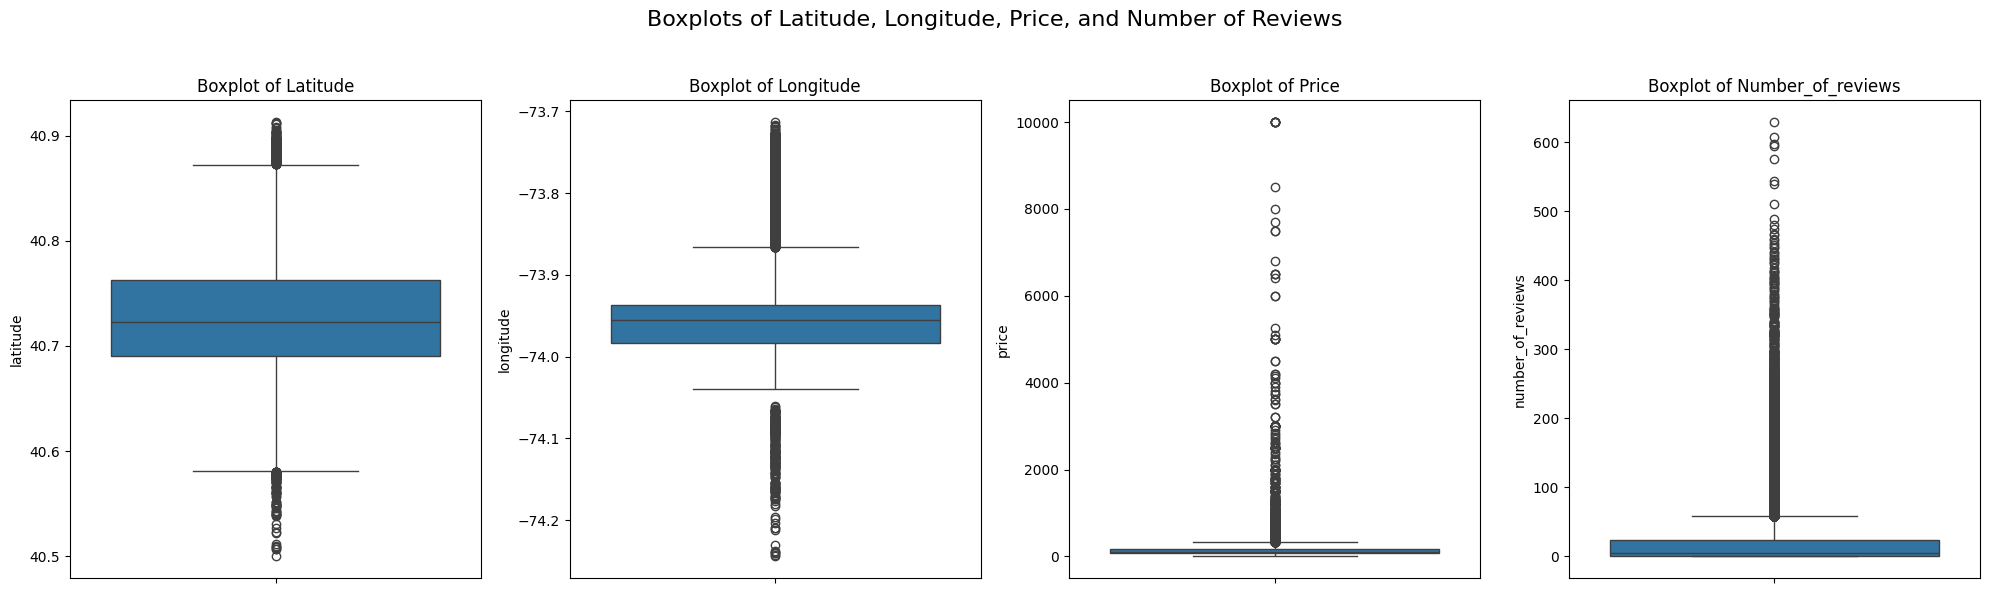

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['latitude', 'longitude', 'price', 'number_of_reviews']

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature.capitalize()}')

fig.suptitle("Boxplots of Latitude, Longitude, Price, and Number of Reviews", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [72]:
price_Q25_from_df = df['price'].quantile(0.25)
price_Q75_from_df = df['price'].quantile(0.75)
nor_Q25_from_df = df['number_of_reviews'].quantile(0.25)
nor_Q75_from_df = df['number_of_reviews'].quantile(0.75)
long_Q25_from_df = df['longitude'].quantile(0.25)
long_Q75_from_df = df['longitude'].quantile(0.75)
lat_Q25_from_df = df['latitude'].quantile(0.25)
lat_Q75_from_df = df['latitude'].quantile(0.75)
print(f"25% quantile of `price` (using the entire dataset): {price_Q25_from_df}")
print(f"75% quantile of `price` (using the entire dataset): {price_Q75_from_df}")
print(f"25% quantile of `longitude` (using the entire dataset): {long_Q25_from_df}")
print(f"75% quantile of `longitude` (using the entire dataset): {long_Q75_from_df}")
print(f"25% quantile of `latitude` (using the entire dataset): {lat_Q25_from_df}")
print(f"75% quantile of `latitude` (using the entire dataset): {lat_Q75_from_df}")
print(f"25% quantile of `number_of_reviews` (using the entire dataset): {nor_Q25_from_df}")
print(f"75% quantile of `number_of_reviews` (using the entire dataset): {nor_Q75_from_df}")

25% quantile of `price` (using the entire dataset): 69.0
75% quantile of `price` (using the entire dataset): 175.0
25% quantile of `longitude` (using the entire dataset): -73.98307
75% quantile of `longitude` (using the entire dataset): -73.936275
25% quantile of `latitude` (using the entire dataset): 40.6901
75% quantile of `latitude` (using the entire dataset): 40.763115
25% quantile of `number_of_reviews` (using the entire dataset): 1.0
75% quantile of `number_of_reviews` (using the entire dataset): 24.0


In [73]:
nor_IQR_from_df = nor_Q75_from_df - nor_Q25_from_df
print(f"IQR of `number_of_reviews` (using the entire dataset): {nor_Q75_from_df} - {nor_Q25_from_df} = {nor_IQR_from_df}")
long_IQR_from_df = long_Q75_from_df - long_Q25_from_df
print(f"IQR of `Longitude` (using the entire dataset): {long_Q75_from_df} - {long_Q25_from_df} = {long_IQR_from_df}")
lat_IQR_from_df = lat_Q75_from_df - lat_Q25_from_df
print(f"IQR of `Latitude` (using the entire dataset): {lat_Q75_from_df} - {lat_Q25_from_df} = {lat_IQR_from_df}")
price_IQR_from_df = price_Q75_from_df - price_Q25_from_df
print(f"IQR of `Price` (using the entire dataset): {price_Q75_from_df} - {price_Q25_from_df} = {price_IQR_from_df}")

IQR of `number_of_reviews` (using the entire dataset): 24.0 - 1.0 = 23.0
IQR of `Longitude` (using the entire dataset): -73.936275 - -73.98307 = 0.04679500000000303
IQR of `Latitude` (using the entire dataset): 40.763115 - 40.6901 = 0.07301499999999805
IQR of `Price` (using the entire dataset): 175.0 - 69.0 = 106.0


In [74]:
price_lower_limit_from_df = price_Q25_from_df - 1.5 * price_IQR_from_df
price_upper_limit_from_df = price_Q75_from_df + 1.5 * price_IQR_from_df
nor_lower_limit_from_df = nor_Q25_from_df - 1.5 * nor_IQR_from_df
nor_upper_limit_from_df = nor_Q75_from_df + 1.5 * nor_IQR_from_df
long_lower_limit_from_df = long_Q25_from_df - 1.5 * long_IQR_from_df
long_upper_limit_from_df = long_Q75_from_df + 1.5 * long_IQR_from_df
lat_lower_limit_from_df = lat_Q25_from_df - 1.5 * lat_IQR_from_df
lat_upper_limit_from_df = lat_Q75_from_df + 1.5 * lat_IQR_from_df

print(f"The lower limit for `Price` outliers (using the entire dataset): {price_lower_limit_from_df}")
print(f"The upper limit for `Price` outliers (using the entire dataset): {price_upper_limit_from_df}")
print(f"The lower limit for `Longitude` outliers (using the entire dataset): {long_lower_limit_from_df}")
print(f"The upper limit for `Longitude` outliers (using the entire dataset): {long_upper_limit_from_df}")
print(f"The lower limit for `Latitude` outliers (using the entire dataset): {lat_lower_limit_from_df}")
print(f"The upper limit for `Latitude` outliers (using the entire dataset): {lat_upper_limit_from_df}")
print(f"The lower limit for `Number_of_reviews` outliers (using the entire dataset): {nor_lower_limit_from_df}")
print(f"The upper limit for `Number_of_reviews` outliers (using the entire dataset): {nor_upper_limit_from_df}")


The lower limit for `Price` outliers (using the entire dataset): -90.0
The upper limit for `Price` outliers (using the entire dataset): 334.0
The lower limit for `Longitude` outliers (using the entire dataset): -74.0532625
The upper limit for `Longitude` outliers (using the entire dataset): -73.86608249999999
The lower limit for `Latitude` outliers (using the entire dataset): 40.580577500000004
The upper limit for `Latitude` outliers (using the entire dataset): 40.872637499999996
The lower limit for `Number_of_reviews` outliers (using the entire dataset): -33.5
The upper limit for `Number_of_reviews` outliers (using the entire dataset): 58.5


In [75]:
df[df['price'] > 300]
df[df['longitude'] > 300]
df[df['latitude'] > 300]
df[df['number_of_reviews'] > 300]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,430
53,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144,328
67,Manhattan,East Village,40.72649,-73.97904,Private room,80,338
104,Brooklyn,Williamsburg,40.71332,-73.94177,Private room,101,335
110,Manhattan,Hell's Kitchen,40.75527,-73.99291,Private room,59,334
...,...,...,...,...,...,...,...
22469,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,436
25249,Queens,South Ozone Park,40.66941,-73.79148,Entire home/apt,50,310
27287,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,403
28651,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,341


In [76]:
X = df[['latitude', 'longitude', 'price', 'room_type', 'number_of_reviews']] 
y = df['neighbourhood'] 

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [78]:
def replace_outliers(X_train, X_test):

    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    columns = X_train.columns

    for column in columns:
        Q25 = X_train_copy[column].quantile(0.25)
        Q75 = X_train_copy[column].quantile(0.75)

        IQR = Q75 - Q25

        upper_limit = Q75 + 1.5 * IQR
        lower_limit = Q25 - 2.5 * IQR

        # Replace outliers in the train set
        X_train_copy[column] = X_train_copy[column].astype(float)
        X_train_copy.loc[X_train_copy[column] < lower_limit, column] = Q25
        X_train_copy.loc[X_train_copy[column] > upper_limit, column] = Q75

        # Replace outliers in the test set
        X_test_copy[column] = X_test_copy[column].astype(float)
        X_test_copy.loc[X_test_copy[column] < lower_limit, column] = Q25
        X_test_copy.loc[X_test_copy[column] > upper_limit, column] = Q75
        
    return X_train_copy, X_test_copy

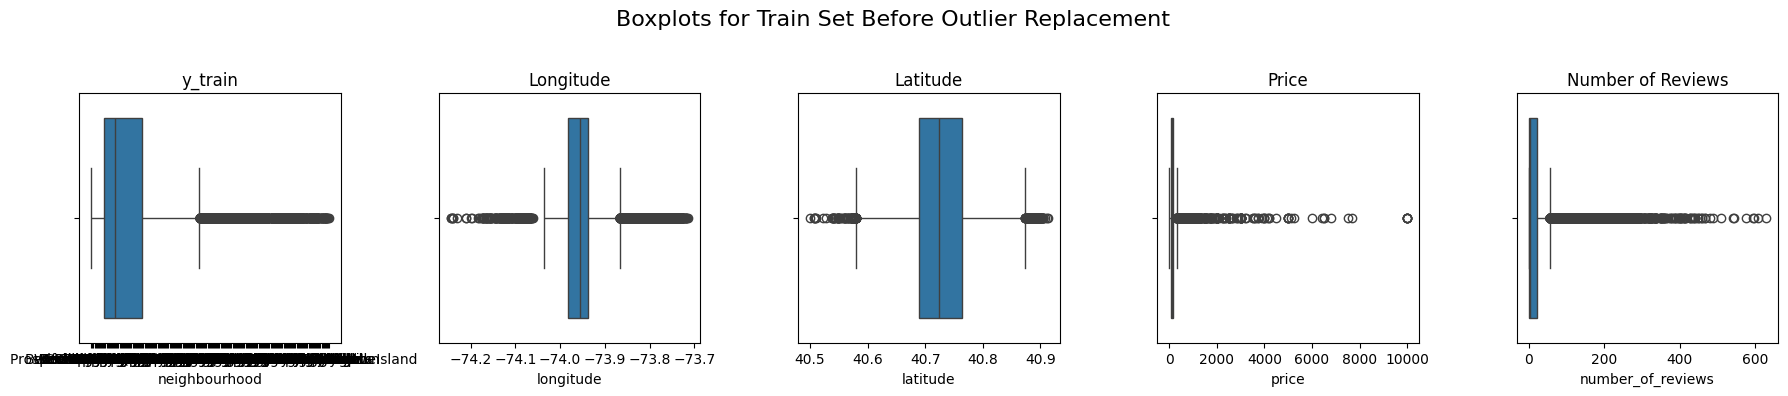

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 5, figsize=(18, 4))

sns.boxplot(ax=axis[0], x=y_train)
axis[0].set_title("y_train")

sns.boxplot(ax=axis[1], data=X_train, x="longitude")
axis[1].set_title("Longitude")

sns.boxplot(ax=axis[2], data=X_train, x="latitude")
axis[2].set_title("Latitude")

sns.boxplot(ax=axis[3], data=X_train, x="price")
axis[3].set_title("Price")

sns.boxplot(ax=axis[4], data=X_train, x="number_of_reviews")
axis[4].set_title("Number of Reviews")

plt.suptitle("Boxplots for Train Set Before Outlier Replacement", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [80]:
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])

X_train_num, X_test_num = replace_outliers(X_train_num, X_test_num)

X_train.update(X_train_num)
X_test.update(X_test_num)

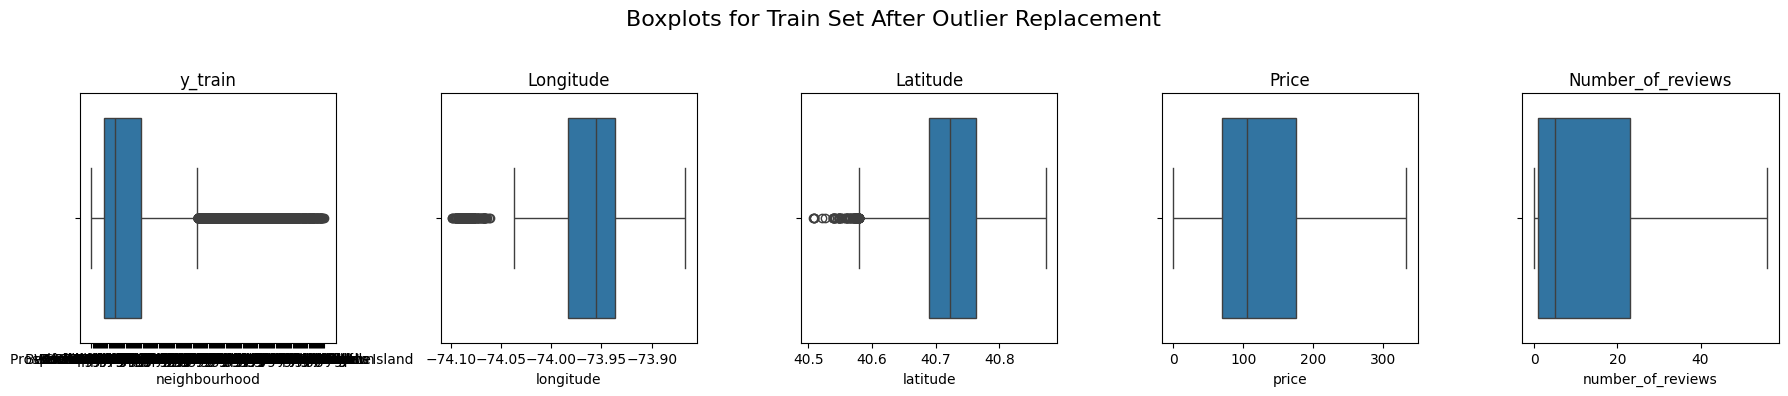

In [81]:

numerical_features = ['longitude', 'latitude', 'price', 'number_of_reviews']
fig, axis = plt.subplots(1, len(numerical_features) + 1, figsize=(18, 4))

sns.boxplot(ax=axis[0], x=y_train)
axis[0].set_title("y_train")

for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axis[i + 1], data=X_train, x=feature)
    axis[i + 1].set_title(feature.capitalize())

plt.suptitle("Boxplots for Train Set After Outlier Replacement", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

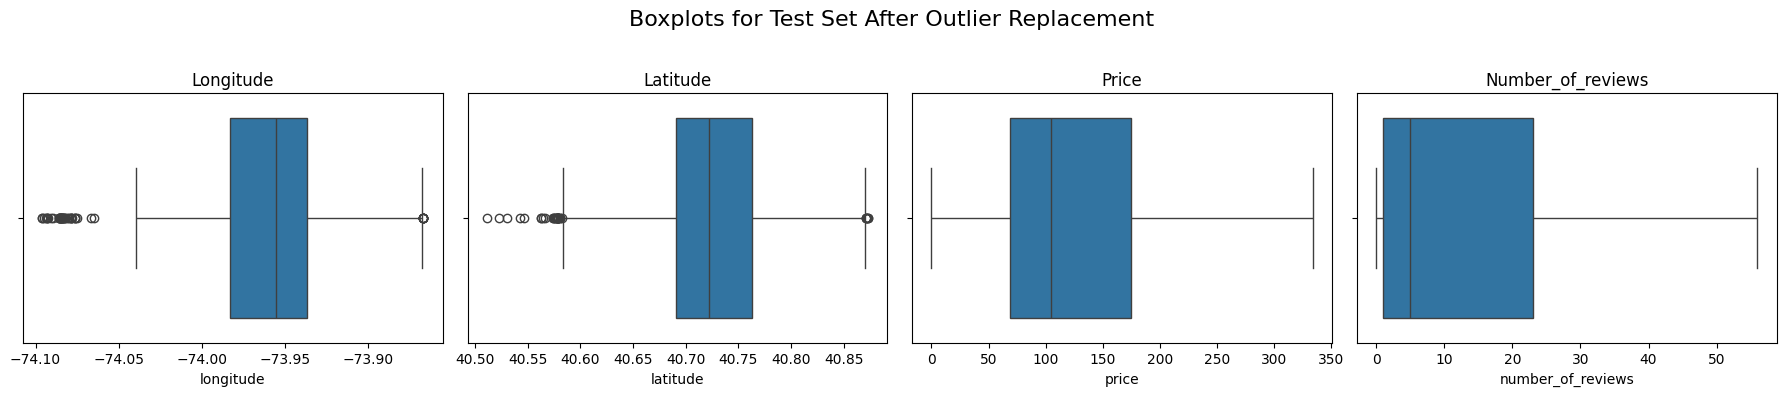

In [82]:

numerical_features = ['longitude', 'latitude', 'price', 'number_of_reviews']
fig, axis = plt.subplots(1, len(numerical_features), figsize=(18, 4))

for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axis[i], data=X_test, x=feature)
    axis[i].set_title(feature.capitalize())

plt.suptitle("Boxplots for Test Set After Outlier Replacement", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [83]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
neighbourhood_group,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
number_of_reviews,0,0.0


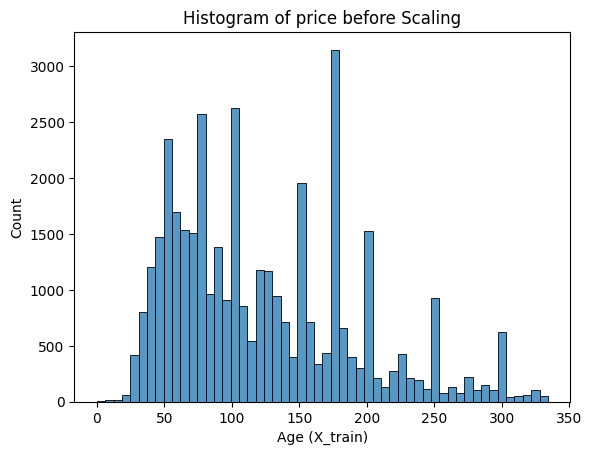

In [84]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sns.histplot(data = X_train, x = "price")
plt.xlabel("Age (X_train)")
plt.title("Histogram of price before Scaling")
plt.show()

In [85]:
round(X_train['price'].mean(), 2), round(X_train['price'].std(), 2)

(np.float64(123.39), np.float64(67.41))

In [87]:
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [88]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test.index)


In [89]:
pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

,latitude,longitude,price,room_type,number_of_reviews
4970,0.491354,0.584246,0.449102,NaN,0.000000
35259,0.705739,0.473829,0.523952,NaN,0.500000
18750,0.478761,0.643184,0.455090,NaN,0.410714
34097,0.457563,0.594205,0.164671,NaN,0.000000
13810,0.618379,0.598776,0.164671,NaN,0.464286
...,...,...,...,...,...
44090,0.732073,0.649996,0.449102,NaN,0.017857
25887,0.426858,0.655773,0.389222,NaN,0.303571
25762,0.766957,0.643701,0.389222,NaN,0.071429
43322,0.781626,0.562128,0.523952,NaN,0.017857


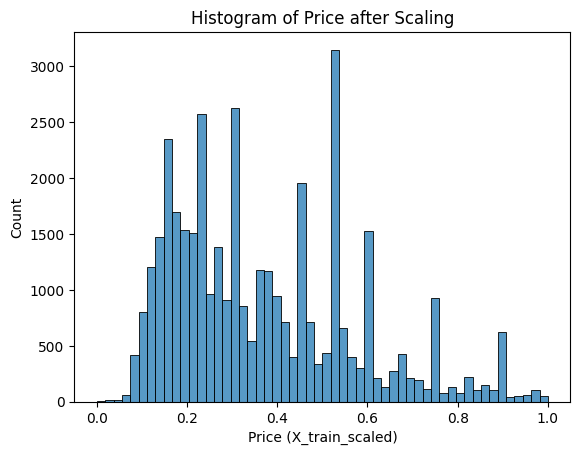

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

sns.histplot(data=X_train_scaled_df['price'], legend=False)
plt.xlabel("Price (X_train_scaled)")
plt.title("Histogram of Price after Scaling")
plt.show()

In [91]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)

SelectKBest(k=5)

In [92]:
selection_model.fit(X_train_scaled, y_train)

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled))
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled))

print("Selected Features - X_train_sel Shape:", X_train_sel.shape)
print("Selected Features - X_test_sel Shape:", X_test_sel.shape)

X_train_sel.head(), X_test_sel.head()

Selected Features - X_train_sel Shape: (39116, 5)
Selected Features - X_test_sel Shape: (9779, 5)


(          0         1         2         3    4
 0  0.491354  0.584246  0.449102  0.000000  0.0
 1  0.705739  0.473829  0.523952  0.500000  0.0
 2  0.478761  0.643184  0.455090  0.410714  0.0
 3  0.457563  0.594205  0.164671  0.000000  1.0
 4  0.618379  0.598776  0.164671  0.464286  1.0,
           0         1         2         3    4
 0  0.399241  0.629689  0.134731  0.089286  1.0
 1  0.336794  0.611796  0.134731  0.160714  1.0
 2  0.682520  0.572476  0.616766  0.053571  0.0
 3  0.979977  0.744977  0.236527  0.464286  1.0
 4  0.706613  0.470941  0.329341  0.250000  1.0)

In [93]:
dict(zip(X_train.columns,selection_model.scores_))

{'latitude': np.float64(13125.935278888373),
 'longitude': np.float64(2789.5502431491045),
 'price': np.float64(62.31941144266165),
 'room_type': np.float64(6.525589229479493),
 'number_of_reviews': np.float64(18.65338574139221)}

In [94]:
X_train_sel['neighbourhood'] = list(y_train)
X_test_sel['neighbourhood'] = list(y_test)

X_train_sel.to_sql('NYC_Clean_Train', con=engine, if_exists='replace', index=False)
print("Dataset stored in SQLite database as 'NYC_Clean_Train' table.")

X_test_sel.to_sql('NYC_Clean_Test', con=engine, if_exists='replace', index=False)
print("Dataset stored in SQLite database as 'NYC_Clean_Test' table.")

Dataset stored in SQLite database as 'NYC_Clean_Train' table.
Dataset stored in SQLite database as 'NYC_Clean_Test' table.


In [95]:
X_train_from_db = pd.read_sql('SELECT * FROM NYC_Clean_Train', con=engine)
X_train_from_db.head()

,0,1,2,3,4,neighbourhood
0,0.491354,0.584246,0.449102,0.000000,0.0,Clinton Hill
1,0.705739,0.473829,0.523952,0.500000,0.0,Hell's Kitchen
2,0.478761,0.643184,0.455090,0.410714,0.0,Bedford-Stuyvesant
3,0.457563,0.594205,0.164671,0.000000,1.0,Crown Heights
4,0.618379,0.598776,0.164671,0.464286,1.0,Greenpoint


In [96]:
X_test_from_db = pd.read_sql('SELECT * FROM NYC_Clean_Test', con=engine)
X_test_from_db.head()

,0,1,2,3,4,neighbourhood
0,0.399241,0.629689,0.134731,0.089286,1.0,East Flatbush
1,0.336794,0.611796,0.134731,0.160714,1.0,Flatbush
2,0.682520,0.572476,0.616766,0.053571,0.0,Midtown
3,0.979977,0.744977,0.236527,0.464286,1.0,Inwood
4,0.706613,0.470941,0.329341,0.250000,1.0,Hell's Kitchen


In [97]:
import os
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

X_train_sel.to_csv(f'{output_dir}/NYC_clean_train.csv', index=False)
print(f'Dataset stored as {output_dir}/NYC_clean_train.csv')

X_test_sel.to_csv(f'{output_dir}/NYC_clean_test.csv', index=False)
print(f'Dataset stored as {output_dir}/NYC_clean_test.csv')

Dataset stored as data/processed/NYC_clean_train.csv
Dataset stored as data/processed/NYC_clean_test.csv
